<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-первичная-обработка-исходных-данных" data-toc-modified-id="Изучение-и-первичная-обработка-исходных-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и первичная обработка исходных данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-исходных-данных" data-toc-modified-id="Анализ-исходных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ исходных данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-обучения" data-toc-modified-id="Подготовка-данных-для-обучения-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных для обучения</a></span><ul class="toc-item"><li><span><a href="#Создание-метрики-rmse" data-toc-modified-id="Создание-метрики-rmse-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание метрики rmse</a></span></li><li><span><a href="#Создание-признаков-для-обучения" data-toc-modified-id="Создание-признаков-для-обучения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание признаков для обучения</a></span></li><li><span><a href="#Разбиение-датасета-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разбиение-датасета-на-обучающую-и-тестовую-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Разбиение датасета на обучающую и тестовую выборки</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#Модель-RandomForestRegressor" data-toc-modified-id="Модель-RandomForestRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель RandomForestRegressor</a></span></li><li><span><a href="#Модель-LGBMRegressor" data-toc-modified-id="Модель-LGBMRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Модель LGBMRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

**Цель проекта:** построить модель для прогнозирования количества заказов такси на следующий час. Значение метрики *RMSE* модели на тестовой выборке должно быть не больше 48. Перед созданием модели необходимо выполнить анализ исходных данных.

**Исходные данные:** исторические данные о заказах такси в аэропортах.

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Изучение и первичная обработка исходных данных

Загружаем необходимые библиотеки.

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer 
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

Загружаем файл и выводим общую информацию об исходных данных.

In [2]:
data = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


In [3]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Пропуски отсутствуют, какие либо аномалии в исходных данных не обнаружены.Проверм дополнительно данные на дубликаты.

In [5]:
data.duplicated().sum()

26415

Дубликатов не выявлено.

В исходном датасете количество заказов дано для промежутков времени равных 10 минутам. С учетом того что, согласно заданию, требуется спрогнозировать количество заказов такси за следующий час, выполним ресемплирование исходных данных с интервалом равным одному часу.

In [6]:
data = data.resample("1H").sum()

Подготовку данных для обучения выполним после анализа исходных данных, так как его результаты могут повлиять на то каким образом подготавливать данные.

### Выводы

1. Файл с исходными данными (26496х1) загружен и преобразован в датафрейм. При этом данные о времени переведены в индекс датафрейма.
2. Пропусков и других аномалий в исходных данных не выявлено.
3. Выполнено ресемплирование исходных данных с временным интервалом равным одному часу.

## Анализ исходных данных

Выведим график изменения количества заказов с течением времени.

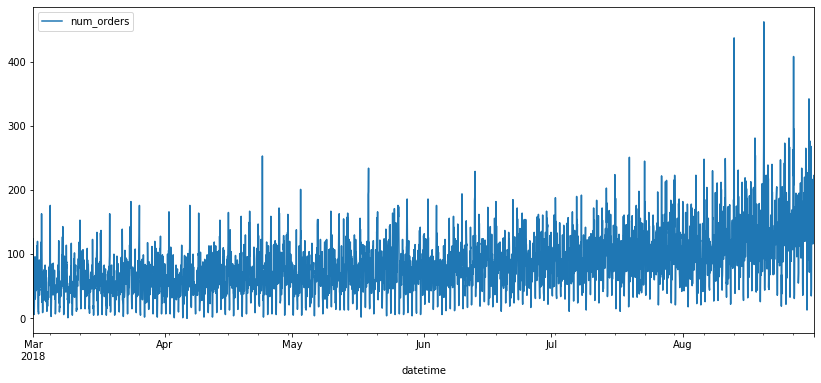

In [7]:
data.plot(figsize=(14, 6))
plt.show()

Ввиду небольшого интервала времени (1 час) график тяжело читается. Выполним ресемплирование с различными интервалами времени: день, неделя, месяц.

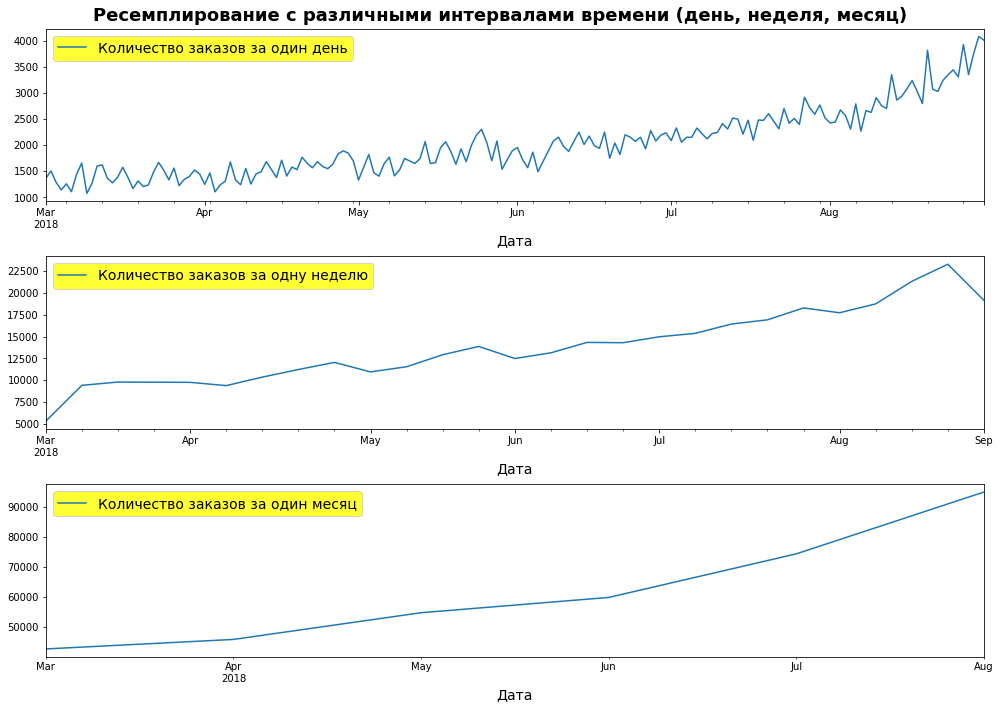

In [8]:
fig, axes = plt.subplots(3, figsize=(14, 10))
fig.suptitle("Ресемплирование с различными интервалами времени (день, неделя, месяц)", fontsize=18, fontweight="bold")
data.resample("1D").sum()["num_orders"].plot(ax=axes[0], label="Количество заказов за один день")
data.resample("1W").sum()["num_orders"].plot(ax=axes[1], label="Количество заказов за одну неделю")
data.resample("1M").sum()["num_orders"].plot(ax=axes[2], label="Количество заказов за один месяц")
for ax in axes.flat:
    ax.legend(fontsize=14, facecolor="yellow")
    ax.set_xlabel("Дата", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

При боле крупных временных интервалах график гораздо более плавный, на нем хорошо прослеживается растущий тренд. Для более детального анализа временного ряда воспользуемся методом seasonal_decompose, позволяющим разложить данный ряд на три составляющие: тренд, сезонность и остатки.

In [9]:
decomposed = seasonal_decompose(data)

Построим графики для временнного ряда, разложенного на составляющие.

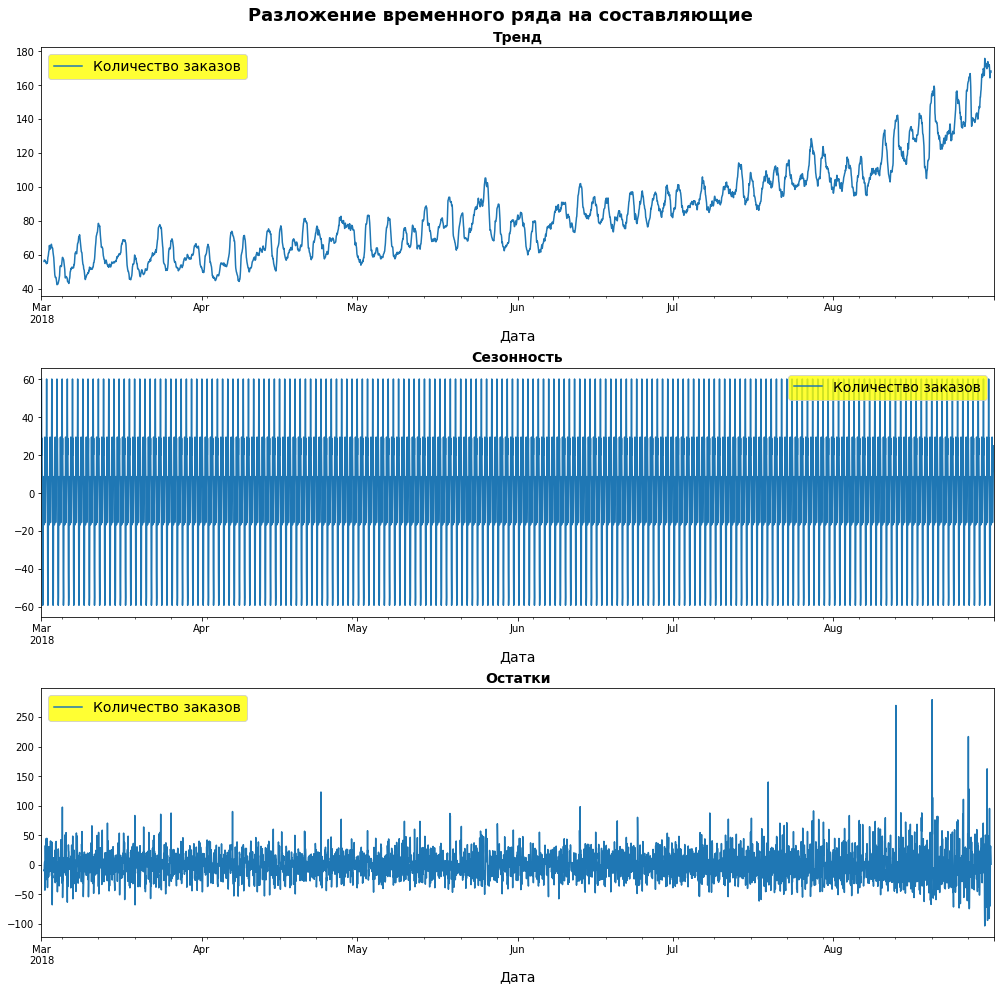

In [10]:
fig, axes = plt.subplots(3, figsize=(14, 14))
fig.suptitle("Разложение временного ряда на составляющие", fontsize=18, fontweight="bold")
decomposed.trend["num_orders"].plot(ax=axes[0], label="Количество заказов")
decomposed.seasonal["num_orders"].plot(ax=axes[1], label="Количество заказов")
decomposed.resid["num_orders"].plot(ax=axes[2], label="Количество заказов")
for ax, ax_title in zip(axes.flat, ["Тренд", "Сезонность", "Остатки"]):
    ax.set_title(ax_title, fontsize=14, fontweight="bold")
    ax.legend(fontsize=14, facecolor="yellow")
    ax.set_xlabel("Дата", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

На полученном графике отчетливо виден растущий тренд. Таким образом, количество заказов такси со временем растет. Сезонность (цикличность) на графике видна существенно хуже. Это связано с маленьким периодом цикла. Построим график сезонности на двух небольших таймфремах равных соответственно одной недели и двум дням.

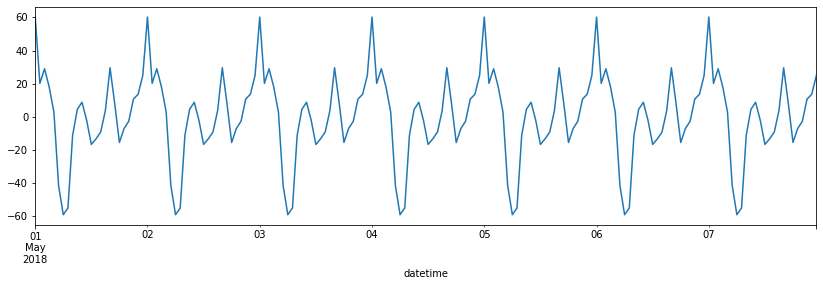

In [11]:
decomposed.seasonal["num_orders"]["2018-05-01":"2018-05-07"].plot(label="Количество заказов", figsize=(14, 4))
plt.show()

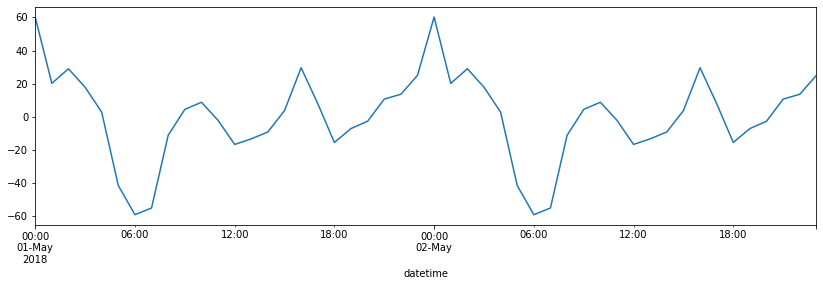

In [12]:
decomposed.seasonal["num_orders"]["2018-05-01":"2018-05-02"].plot(label="Количество заказов", figsize=(14, 4))
plt.show()

На полученных графиках хорошо видно, что период цикла составляет одни сутки. Максимальное количество заказов такси в аэропорт наблюдается около 24-00, что можно связать с резким уменьшением трафика общественного транспорта в это время. Минимум отстоит от максимума на небольшом расстоянии, равном всего нескольким часам, и соответствует приблизительно 6-00. Это может быть связано как с быстрым восстановлением трафика общественного транспорта, так и с падением трафика самолетов в данное время.

Проанализируем исходные данные при помощи скользящих средних с интервалами равными 10 и 50 часам, кроме того выведим на график информацию о стандартном отклонении (для скользящей средней с интервалом в 50 часов). При этом, чтобы не изменять в ходе выполнения анализа исходный датафрейм, создадим его копию под названием data_analys.

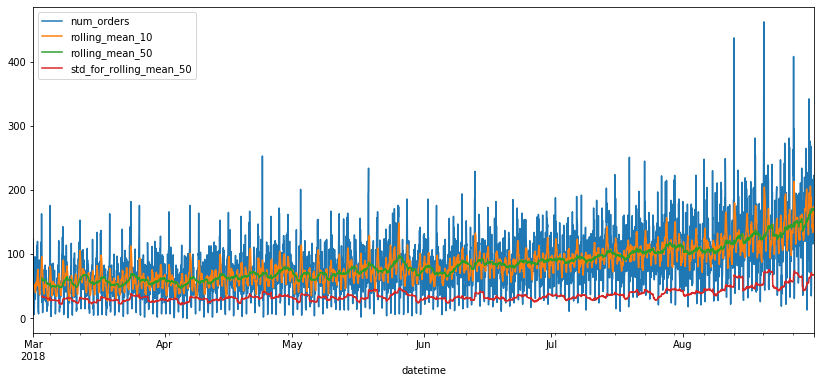

In [13]:
data_analys = data.copy()
data_analys["rolling_mean_10"] = data_analys["num_orders"].rolling(10).mean()
data_analys["rolling_mean_50"] = data_analys["num_orders"].rolling(50).mean()
data_analys["std_for_rolling_mean_50"] = data_analys["num_orders"].rolling(50).std()
data_analys.plot(figsize=(14, 6))
plt.show()

Полученный график плохо читается, построим его для более узкого таймфрема длиной в 15 дней.

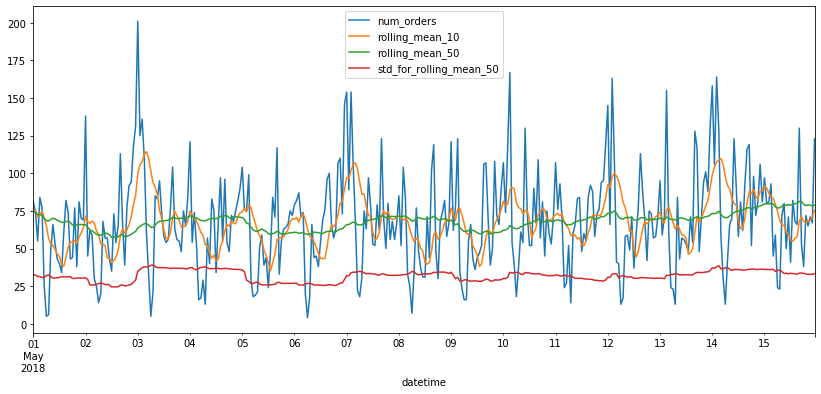

In [14]:
data_analys["2018-05-01":"2018-05-15"].plot(figsize=(14, 6))
plt.show()

Как видно из полученного графика, скользящая уже при интервале времени равном 10 часам дает приемлимые результаты, существенно сглаживая график. Учтем это при создании признаков для обучения.

Выполним анализ также при помощи разностей временного ряда. 

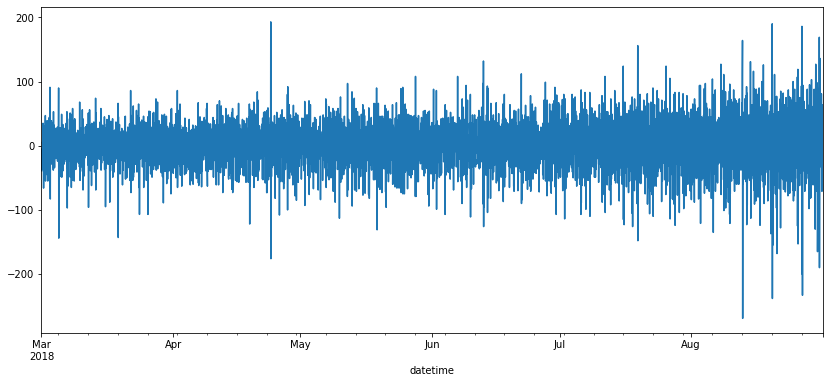

In [15]:
data_analys["time_series_differencies"] = data_analys["num_orders"] - data_analys["num_orders"].shift()
data_analys["time_series_differencies"].plot(figsize=(14, 6))
plt.show()

Размах графика уменьшился (по сравнению с графиком data.plot()), но не очень существенно, что свидетельствует о резких изменениях количества заказов в течение часа.

### Выводы

1. Выполнен анализ исходных данных при помощи: ресемплирования с различными интервалами (1 час, 1 день, 1 сутки, 1 месяц), рассмотрения небольших таймфреймов времени, разложения временного ряда на составляющие (тренд, сезонность и остатки), скользящих средних и разностей временного ряда.
2. Согласно результатам анализа, четко прослеживается растущий тренд количества заказов.
3. Цикличность изменения количества заказов составляет одни сутки. Локальный максимум заказов соответствует приблизительно 24-00 часам, минимум - 6-00 часам.
4. При детальном рассмотрении на небольшом таймфреме размером в 15 дней, уже при интервале равном 10 часам скользящая средняя дает приемлимые результаты, существенно сглаживая график. Учтем это при создании признаков для обучения.

## Подготовка данных для обучения

### Создание метрики rmse

В библиотеки sklearn отсутствует готовая метрика качества модели rmse (root mean squared error). С учетом этого создадим данную метрику при помощи инструмента "make_scorer".

In [16]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

In [17]:
rmse_score = make_scorer(rmse, greater_is_better = False)

### Создание признаков для обучения

Создадим следующие признаки для обучения: календарные признаки, отстающие значения и скользящее среднее. Для автоматизации данного процесса напишем программу make_features.

In [18]:
def make_features(data, max_lag, rolling_mean_size):
    data["month"] = data.index.month
    data["week"] = data.index.week
    data["dayofweek"] = data.index.dayofweek
    data["hour"] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data["lag_{}".format(lag)] = data["num_orders"].shift(lag)
    
    data["rolling_mean_{}".format(rolling_mean_size)] = data["num_orders"].shift().rolling(rolling_mean_size).mean()

Запустим программу make_features для создания признаков и выведем первые пять строк измененного датафрейма.

In [19]:
make_features(data, 6, 10)
data.head()

,num_orders,month,week,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean_10
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,9,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,9,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,9,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,9,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,9,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN


Как видно из таблицы, в измененном датафрейме присутствуют пропуски.

### Разбиение датасета на обучающую и тестовую выборки

Выполним разбиение датасета на обучающую и тестовую выборки.

In [20]:
train, test = train_test_split(data, test_size=0.1, shuffle=False, random_state=56789)

Удалим из обучающей выборки строки с пропусками. 

In [21]:
train = train.dropna()

In [22]:
x_train = train.drop("num_orders", axis=1)
y_train = train["num_orders"]
x_test = test.drop("num_orders", axis=1)
y_test = test["num_orders"]
print("Количество объектов в целом датасете:", data.shape[0])
print("Количество объектов в обучающей выборке:", x_train.shape[0])
print("Количество объектов в тестовой выборке:", x_test.shape[0])

Количество объектов в целом датасете: 4416
Количество объектов в обучающей выборке: 3964
Количество объектов в тестовой выборке: 442


### Выводы

1. Создана метрика качества rmse (root mean squared error).
2. Написана программа make_features. При помощи данной программы созданы признаки для обучения (календарные признаки, отстающие значения и скользящее среднее).
3. Датасет разбит на обучающую и тестовую выборки.

## Обучение моделей

### Модель LinearRegression

Выполним обучение модели LinearRegression и оценим ее качество при помощи метрики rmse и кросс-валидации.

In [23]:
cv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(LinearRegression(), x_train, y_train, cv=cv, scoring=rmse_score)
print(scores.mean()*(-1))

31.564861042398643


### Модель RandomForestRegressor

Создадим список гиперпараметров, которые проверим при обучении модели.

In [24]:
param_grid = {
   "n_estimators": [20, 60],
    "max_depth": [4, 8]
}

Найдем оптимальные гиперпараметры модели при помощи метрики rmse и GridSearchCV.

In [25]:
random_forest_model = RandomForestRegressor(random_state=56789)
search_random_forest = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=cv, scoring=rmse_score)
search_random_forest.fit(x_train, y_train)
search_random_forest.best_params_

{'max_depth': 8, 'n_estimators': 60}

Гиперпараметры лучшей модели: max_depth=8 и n_estimators=60. Выведим метрику rmse при использовании лучших гиперпараметров.

In [26]:
search_random_forest.best_score_ * (-1)

25.67247314272613

### Модель LGBMRegressor

Создадим список гиперпараметров, которые проверим при обучении модели.

In [27]:
param_grid = {
   "n_estimators": [20, 60],
    "learning_rate": [0.5, 0.1]
}

Найдем оптимальные гиперпараметры модели при помощи метрики rmse и GridSearchCV.

In [28]:
LGBM_model = LGBMRegressor(seed=56789)
search_LGBM = GridSearchCV(estimator=LGBM_model, param_grid=param_grid, cv=cv, scoring=rmse_score)
search_LGBM.fit(x_train, y_train)
search_LGBM.best_params_

{'learning_rate': 0.1, 'n_estimators': 60}

Гиперпараметры лучшей модели: learning_rate=0.1 и n_estimators=60. Выведим метрику rmse при использовании лучших гиперпараметров.

In [29]:
search_LGBM.best_score_*(-1)

24.606815641809714

### Вывод

Выполнено обучение трех моделей: LinearRegression, RandomForestRegressor и LGBMRegressor. Для последних двух моделей выполнен подбор оптимальных гиперпараметров с использованием метрики RMSE и метода кросс-валидации.

## Тестирование моделей

Для автоматизации процесса тестирования моделей воспользуемся циклом. Для этого предварительно создадим список с именами моделей с лучшими гиперпараметрами (для модели LinearRegression гиперпараметры не подбирались) и список с условными названиями моделей.

In [30]:
models_list = [LinearRegression(), search_random_forest.best_estimator_, search_LGBM.best_estimator_]
model_names = ["LinearRegression", "RandomForestRegressor", "LGBMRegressor"]
for model, model_name in zip(models_list, model_names):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = rmse(y_test, predictions)
    print(model_name)
    print("RMSE модели:", score)
    print()

LinearRegression
RMSE модели: 53.13502610098212

RandomForestRegressor
RMSE модели: 47.5447622430139

LGBMRegressor
RMSE модели: 45.57922608006136



Как видно из полученных результатов, лучшее качество показала модель LGBMRegressor. Заданный порог (RMSE меньше 48) преодолели две модели: LGBMRegressor и RandomForestRegressor.

Для проверки адекватности моделей дополнительно подсчитаем RMSE для медианной модели.

In [31]:
y_median = pd.Series(y_train.median(), index = y_test.index)
rmse(y_test, y_median)

87.15277582981295

### Выводы

1. Согласно выполненному тестированию, лучшая оценка качества RMSE соответствует модели LGBMRegressor. RMSE данной модели равен 45,6. RMSE моделей RandomForestRegressor и LinearRegression равен 47,5 и 53,1 соответственно. Таким образом, заданный порог (RMSE меньше 48) преодолели две модели: LGBMRegressor и RandomForestRegressor. Данные модели можно рекомендовать к дальнешему использованию.
2. Оценка качества RMSE всех трех рассматриваемых моделей существенно превосходит данную оценку для медианной модели (RMSE = 87,2), что говорит об адекватности данных моделей.
3. Дальнейшее повышение качества моделей возможно как через изменение гиперпараметров, так и через добавление новых признаков в датасет, используемый для обучения.
4. Обращает на себя внимание существенно большее значение RMSE моделей на тестовой выборке по сравнению со значением, полученным методом кросс-валидации. Так, например, для LGBMRegressor при кросс-валидации RMSE = 24,6, а при тестировании RMSE = 45,6. При этом кросс-валидация выполнялась с использованием метода разбиения данных TimeSeriesSplit, специально предназначенного для временных рядов. Причины столь большого падения качества не совсем понятны. В качестве гипотезы можно предположить, что закономерности изменения величины заказов в последнее время претерпели существенные изменения, в результате чего качество предсказания модели, обученной с использованием прошлого опыта за большой промежуток времени, существенно ухудшилось.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48